<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/IMDB_Data_with_RNN_And_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
from keras.layers import SimpleRNN


In [10]:
from keras.models import Sequential
from keras.layers import Embedding

In [11]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [15]:
num_features = 1000
maxlen = 500
batch_size = 32

In [16]:
print('Load data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_features)


Load data..
17464789/17464789 [==============================] - 0s 0us/step


In [17]:
print(len(input_train), 'Eğitim dizisi', input_train.shape)
print(len(input_test), 'test dizisi', input_test.shape)

25000 Eğitim dizisi (25000,)
25000 test dizisi (25000,)


In [18]:
print('Pad sequnce (sample x train)')


Pad sequnce (sample x train)


In [29]:
pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:

from keras.utils import pad_sequences


In [51]:
input_train =keras.utils.pad_sequences(input_train, maxlen=maxlen)
input_test = keras.utils.pad_sequences(input_test, maxlen=maxlen)

In [49]:
print(len(input_train), 'Eğitim dizisi', input_train.shape)
print(len(input_test), 'test dizisi', input_test.shape)

25000 Eğitim dizisi (25000, 500)
25000 test dizisi (25000, 500)


In [52]:
from keras.layers import Dense
from keras import layers

In [53]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 44ms/step - loss: 0.5671 - acc: 0.7027 - val_loss: 0.4517 - val_acc: 0.7992
Epoch 2/10
157/157 [==============================] - 6s 40ms/step - loss: 0.4027 - acc: 0.8303 - val_loss: 0.4137 - val_acc: 0.8162
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3700 - acc: 0.8469 - val_loss: 0.3600 - val_acc: 0.8502
Epoch 4/10
157/157 [==============================] - 6s 41ms/step - loss: 0.3420 - acc: 0.8580 - val_loss: 0.3378 - val_acc: 0.8606
Epoch 5/10
157/157 [==============================] - 7s 43ms/step - loss: 0.3360 - acc: 0.8609 - val_loss: 0.3644 - val_acc: 0.8462
Epoch 6/10
157/157 [==============================] - 6s 37ms/step - loss: 0.3275 - acc: 0.8633 - val_loss: 0.3478 - val_acc: 0.8552
Epoch 7/10
157/157 [==============================] - 6s 41ms/step - loss: 0.3171 - acc: 0.8693 - val_loss: 0.3426 - val_acc: 0.8532
Epoch 8/10
157/157 [==============================] - 6s 39ms/step -

In [56]:
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 7s 48ms/step - loss: 0.2976 - acc: 0.8771 - val_loss: 0.4820 - val_acc: 0.7786
Epoch 2/10
157/157 [==============================] - 6s 37ms/step - loss: 0.2933 - acc: 0.8798 - val_loss: 0.3413 - val_acc: 0.8576
Epoch 3/10
157/157 [==============================] - 8s 48ms/step - loss: 0.2922 - acc: 0.8800 - val_loss: 0.3518 - val_acc: 0.8482
Epoch 4/10
157/157 [==============================] - 6s 37ms/step - loss: 0.2864 - acc: 0.8825 - val_loss: 0.3857 - val_acc: 0.8462
Epoch 5/10
157/157 [==============================] - 6s 37ms/step - loss: 0.2845 - acc: 0.8827 - val_loss: 0.3512 - val_acc: 0.8550
Epoch 6/10
157/157 [==============================] - 6s 41ms/step - loss: 0.2772 - acc: 0.8866 - val_loss: 0.3404 - val_acc: 0.8510
Epoch 7/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2752 - acc: 0.8882 - val_loss: 0.3399 - val_acc: 0.8536
Epoch 8/10
157/157 [==============================] - 8s 54ms/step - 

In [62]:
import matplotlib.pyplot as plt


In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

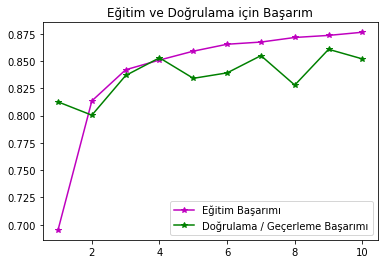

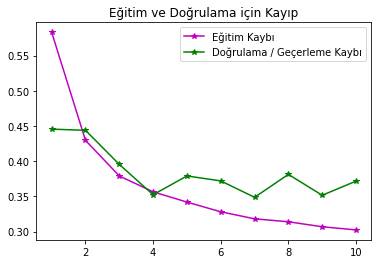

In [64]:
plt.plot(epochs, acc, 'm*-', label= 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label= 'Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label= 'Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt. legend()

plt.show()

In [65]:
print(acc, 'eğitim başarımları')


[0.6952000260353088, 0.8134999871253967, 0.8420500159263611, 0.8509500026702881, 0.8590999841690063, 0.8654500246047974, 0.8674499988555908, 0.871649980545044, 0.8735499978065491, 0.8764500021934509] eğitim başarımları


In [66]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          32000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 43ms/step - loss: 0.5757 - acc: 0.7054 - val_loss: 0.5409 - val_acc: 0.7584
Epoch 2/10
157/157 [==============================] - 6s 38ms/step - loss: 0.4155 - acc: 0.8216 - val_loss: 0.3537 - val_acc: 0.8516
Epoch 3/10
157/157 [==============================] - 6s 38ms/step - loss: 0.3718 - acc: 0.8443 - val_loss: 0.3553 - val_acc: 0.8488
Epoch 4/10
157/157 [==============================] - 6s 38ms/step - loss: 0.3487 - acc: 0.8558 - val_loss: 0.3464 - val_acc: 0.8572
Epoch 5/10
157/157 [==============================] - 6s 37ms/step - loss: 0.3310 - acc: 0.8620 - val_loss: 0.4197 - val_acc: 0.8080
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.3221 - acc: 0.8671 - val_loss: 0.4487 - val_acc: 0.8360
Epoch 7/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3167 - acc: 0.8686 - val_loss: 0.3914 - val_acc: 0.8372
Epoch 8/10
157/157 [==============================] - 6s 40ms/step -

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [70]:
epochs = range(1, len(acc) + 1)


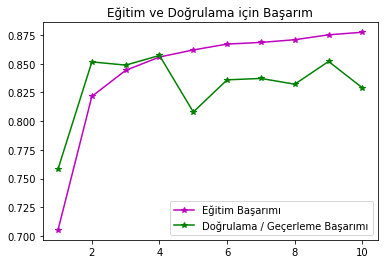

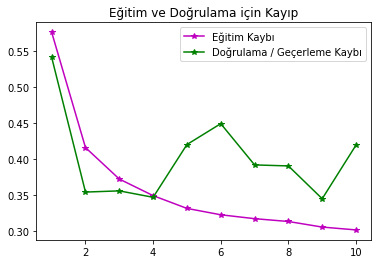

In [71]:
plt.plot(epochs, acc, 'm*-', label= 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label= 'Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label= 'Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt. legend()

plt.show()

In [72]:
print(acc, 'eğitim başarımları')


[0.7053999900817871, 0.8216000199317932, 0.8442500233650208, 0.8558499813079834, 0.8619999885559082, 0.8671000003814697, 0.8685500025749207, 0.8708999752998352, 0.8751500248908997, 0.8773999810218811] eğitim başarımları
